In [ ]:
# Modules
from matplotlib.image import imread
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline


from warnings import filterwarnings


from google.colab import drive
import warnings

warnings.filterwarnings('ignore')
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:

# Import the data
df = pd.read_csv("/content/gdrive/MyDrive/data_eeg_in_csv.csv")

df.head()


,Pz,P3,P7,O1,Oz,O2,P4,P8,P1,P5,PO7,PO3,POz,PO4,PO8,P6,P2,label
0,0.949867,-0.412790,-0.322089,0.751464,1.817943,1.433026,0.689987,-1.054576,-0.381360,-0.237432,0.610876,0.807887,-0.387744,0.836812,0.031605,0.180892,0.713202,Biscuit
1,-1.438008,-0.619738,-1.026245,-0.856272,-0.683106,-0.478521,0.074579,-1.367111,-0.474807,-0.182218,-0.561408,-1.596942,-1.876672,0.168698,-0.243984,0.033856,-1.331574,Biscuit
2,-1.473790,-0.968607,-1.147936,0.967766,0.324674,0.510022,0.345058,-0.929844,-0.844814,-0.824933,-0.936504,-0.546616,-0.033366,0.165388,-0.772637,-0.966099,0.024178,Biscuit
3,-0.172934,1.165387,1.207597,1.366681,0.932849,0.162062,-0.569059,-0.857833,0.891493,1.323472,0.894634,0.554903,-0.872456,-0.683542,-0.588627,-2.013185,-1.028050,Biscuit
4,0.367294,0.017011,-1.681696,-0.910858,-0.515992,-0.315080,0.925285,-0.210909,0.425723,0.070810,-1.161866,1.156145,-0.034877,0.933107,-0.123902,1.200219,0.547526,Biscuit


In [ ]:
df.shape
#519 row, 18 columns 

(519, 18)

In [ ]:
col_names = df.columns

col_names

Index(['Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'P1', 'P5', 'PO7',
       'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'label'],
      dtype='object')

In [ ]:
# check distribution of target_class column
df['label'].value_counts()

Biscuit      40
Bed          40
Drink        40
Toilet       40
Spaghetti    40
Steak        40
Cot          40
Sofabed      40
Pillow       40
Smoothie     40
Soda         40
Shower       40
Tomato       39
Name: label, dtype: int64

In [ ]:
# view the percentage distribution of target_class column
df['label'].value_counts()/np.float(len(df))

Biscuit      0.077071
Bed          0.077071
Drink        0.077071
Toilet       0.077071
Spaghetti    0.077071
Steak        0.077071
Cot          0.077071
Sofabed      0.077071
Pillow       0.077071
Smoothie     0.077071
Soda         0.077071
Shower       0.077071
Tomato       0.075145
Name: label, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pz      519 non-null    float64
 1   P3      519 non-null    float64
 2   P7      519 non-null    float64
 3   O1      519 non-null    float64
 4   Oz      519 non-null    float64
 5   O2      519 non-null    float64
 6   P4      519 non-null    float64
 7   P8      519 non-null    float64
 8   P1      519 non-null    float64
 9   P5      519 non-null    float64
 10  PO7     519 non-null    float64
 11  PO3     519 non-null    float64
 12  POz     519 non-null    float64
 13  PO4     519 non-null    float64
 14  PO8     519 non-null    float64
 15  P6      519 non-null    float64
 16  P2      519 non-null    float64
 17  label   519 non-null    object 
dtypes: float64(17), object(1)
memory usage: 73.1+ KB


In [ ]:
# check for missing values in variables
df.isnull().sum()

Pz       0
P3       0
P7       0
O1       0
Oz       0
O2       0
P4       0
P8       0
P1       0
P5       0
PO7      0
PO3      0
POz      0
PO4      0
PO8      0
P6       0
P2       0
label    0
dtype: int64

In [ ]:
# view summary statistics in numerical variables

round(df.describe(),2)

,Pz,P3,P7,O1,Oz,O2,P4,P8,P1,P5,PO7,PO3,POz,PO4,PO8,P6,P2
count,519.00,519.00,519.00,519.00,519.00,519.00,519.00,519.00,519.00,519.00,519.00,519.00,519.00,519.00,519.00,519.00,519.00
mean,0.19,-0.12,-0.28,-0.20,0.06,0.03,-0.00,-0.16,0.04,-0.24,-0.32,-0.08,0.26,0.04,-0.17,-0.03,0.08
std,1.08,0.90,1.33,0.95,0.95,0.95,0.79,1.06,0.92,0.95,0.94,0.93,1.08,0.88,0.94,0.88,0.89
min,-3.23,-4.07,-18.80,-4.99,-3.74,-4.27,-2.88,-4.50,-3.68,-4.58,-3.32,-3.18,-2.80,-2.92,-3.19,-2.62,-2.79
25%,-0.48,-0.66,-0.45,-0.80,-0.55,-0.57,-0.50,-0.76,-0.50,-0.79,-0.90,-0.70,-0.48,-0.52,-0.77,-0.60,-0.47
50%,0.22,-0.14,-0.08,-0.20,0.14,0.04,-0.01,-0.14,0.09,-0.22,-0.34,-0.05,0.20,0.00,-0.17,-0.04,0.08
75%,0.90,0.48,0.12,0.40,0.67,0.59,0.52,0.46,0.63,0.37,0.28,0.62,0.95,0.62,0.41,0.51,0.65
max,3.20,2.82,10.25,3.13,3.80,3.12,1.79,3.57,3.03,3.11,2.37,2.60,4.46,3.47,2.95,2.79,4.63


Text(0, 0.5, 'P8')

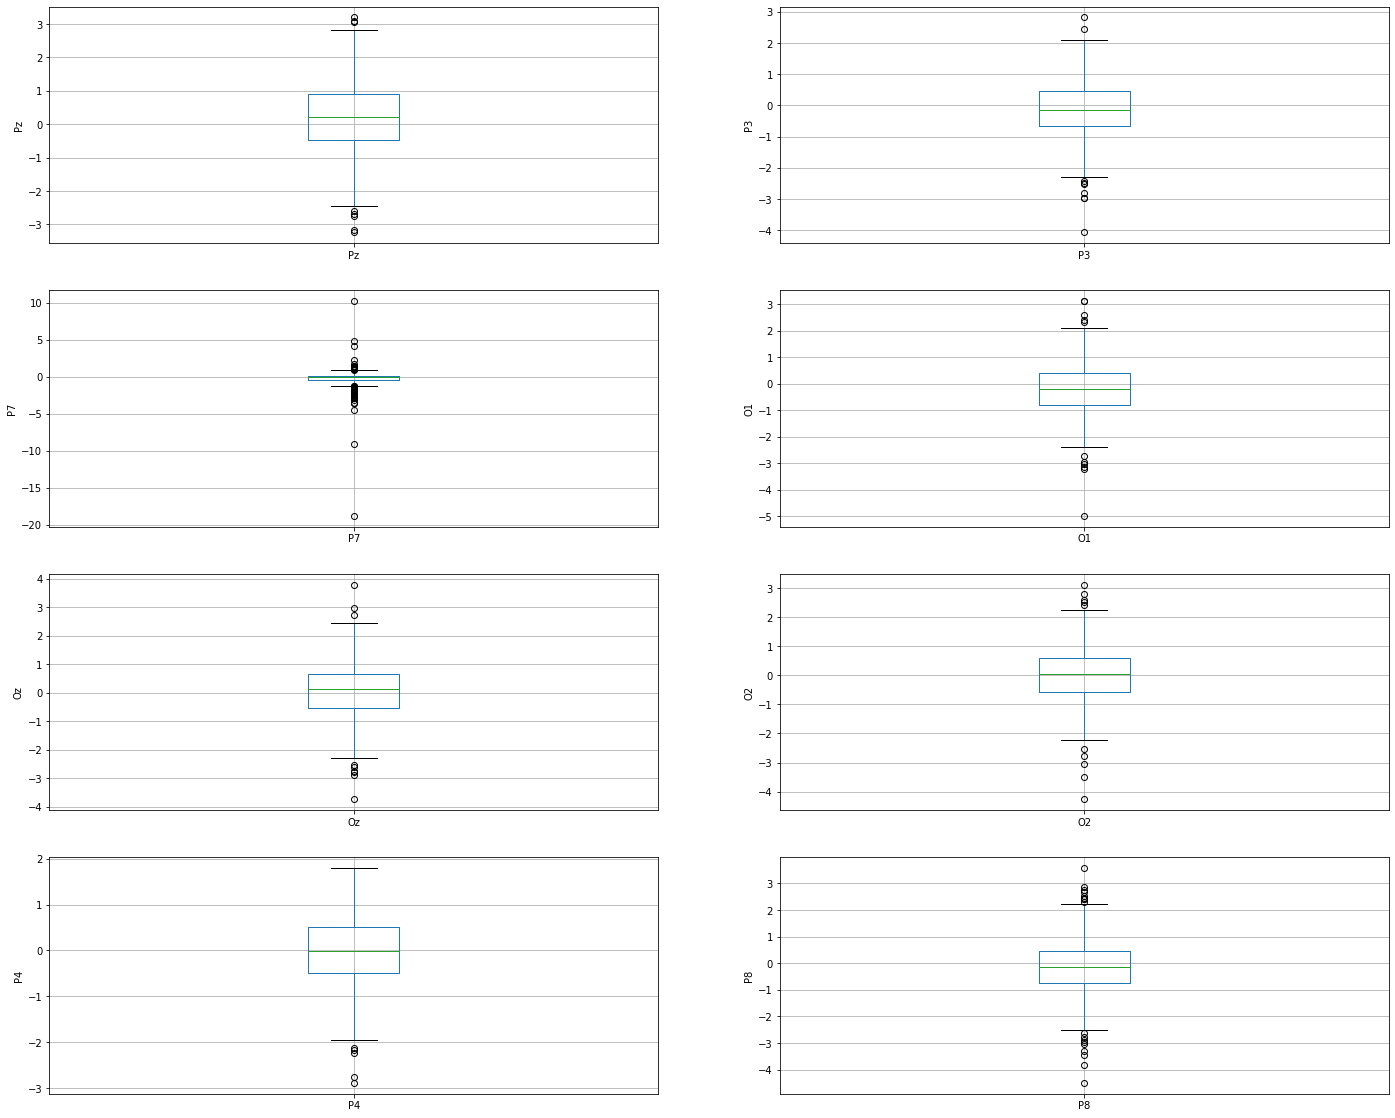

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='Pz')
fig.set_title('')
fig.set_ylabel('Pz')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='P3')
fig.set_title('')
fig.set_ylabel('P3')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='P7')
fig.set_title('')
fig.set_ylabel('P7')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='O1')
fig.set_title('')
fig.set_ylabel('O1')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='Oz')
fig.set_title('')
fig.set_ylabel('Oz')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='O2')
fig.set_title('')
fig.set_ylabel('O2')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='P4')
fig.set_title('')
fig.set_ylabel('P4')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='P8')
fig.set_title('')
fig.set_ylabel('P8')


Text(0, 0.5, 'P6')

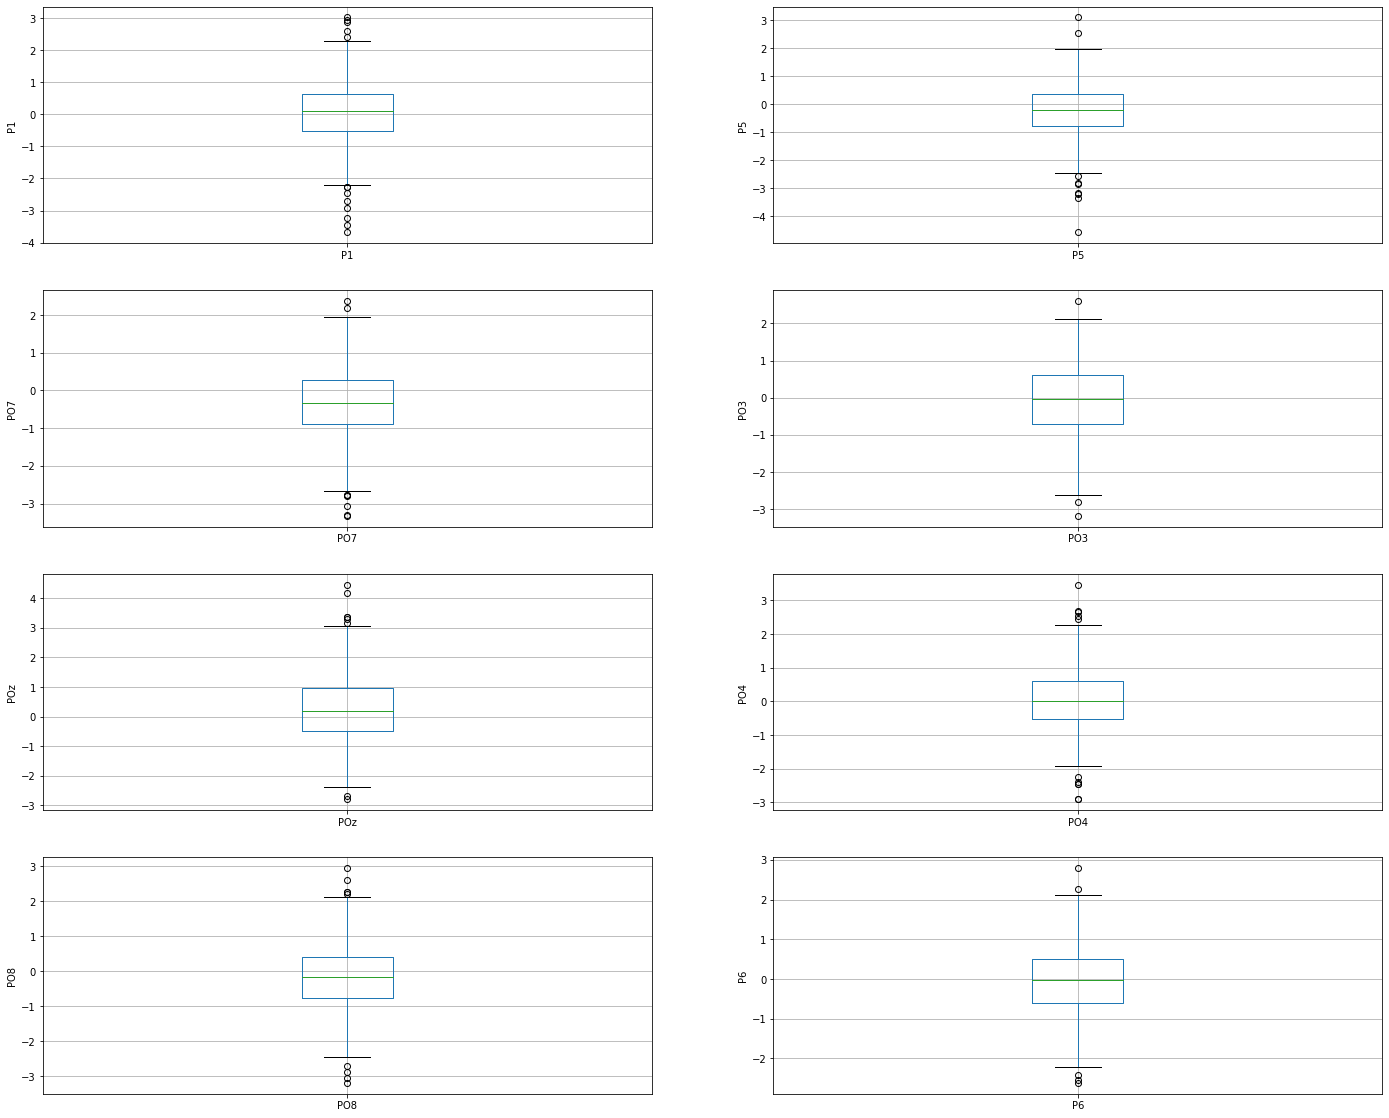

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='P1')
fig.set_title('')
fig.set_ylabel('P1')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='P5')
fig.set_title('')
fig.set_ylabel('P5')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='PO7')
fig.set_title('')
fig.set_ylabel('PO7')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='PO3')
fig.set_title('')
fig.set_ylabel('PO3')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='POz')
fig.set_title('')
fig.set_ylabel('POz')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='PO4')
fig.set_title('')
fig.set_ylabel('PO4')

plt.subplot(4, 2, 7)
fig = df.boxplot(column='PO8')
fig.set_title('')
fig.set_ylabel('PO8')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='P6')
fig.set_title('')
fig.set_ylabel('P6')



Text(0, 0.5, 'P2')

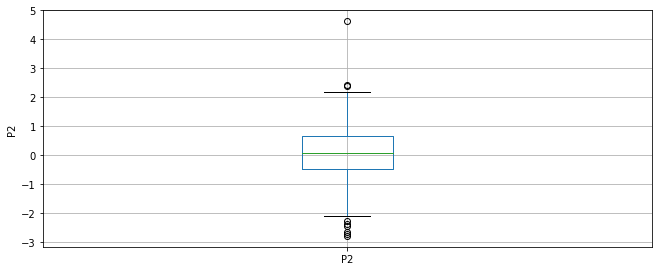

In [ ]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='P2')
fig.set_title('')
fig.set_ylabel('P2')

Text(0, 0.5, 'Label')

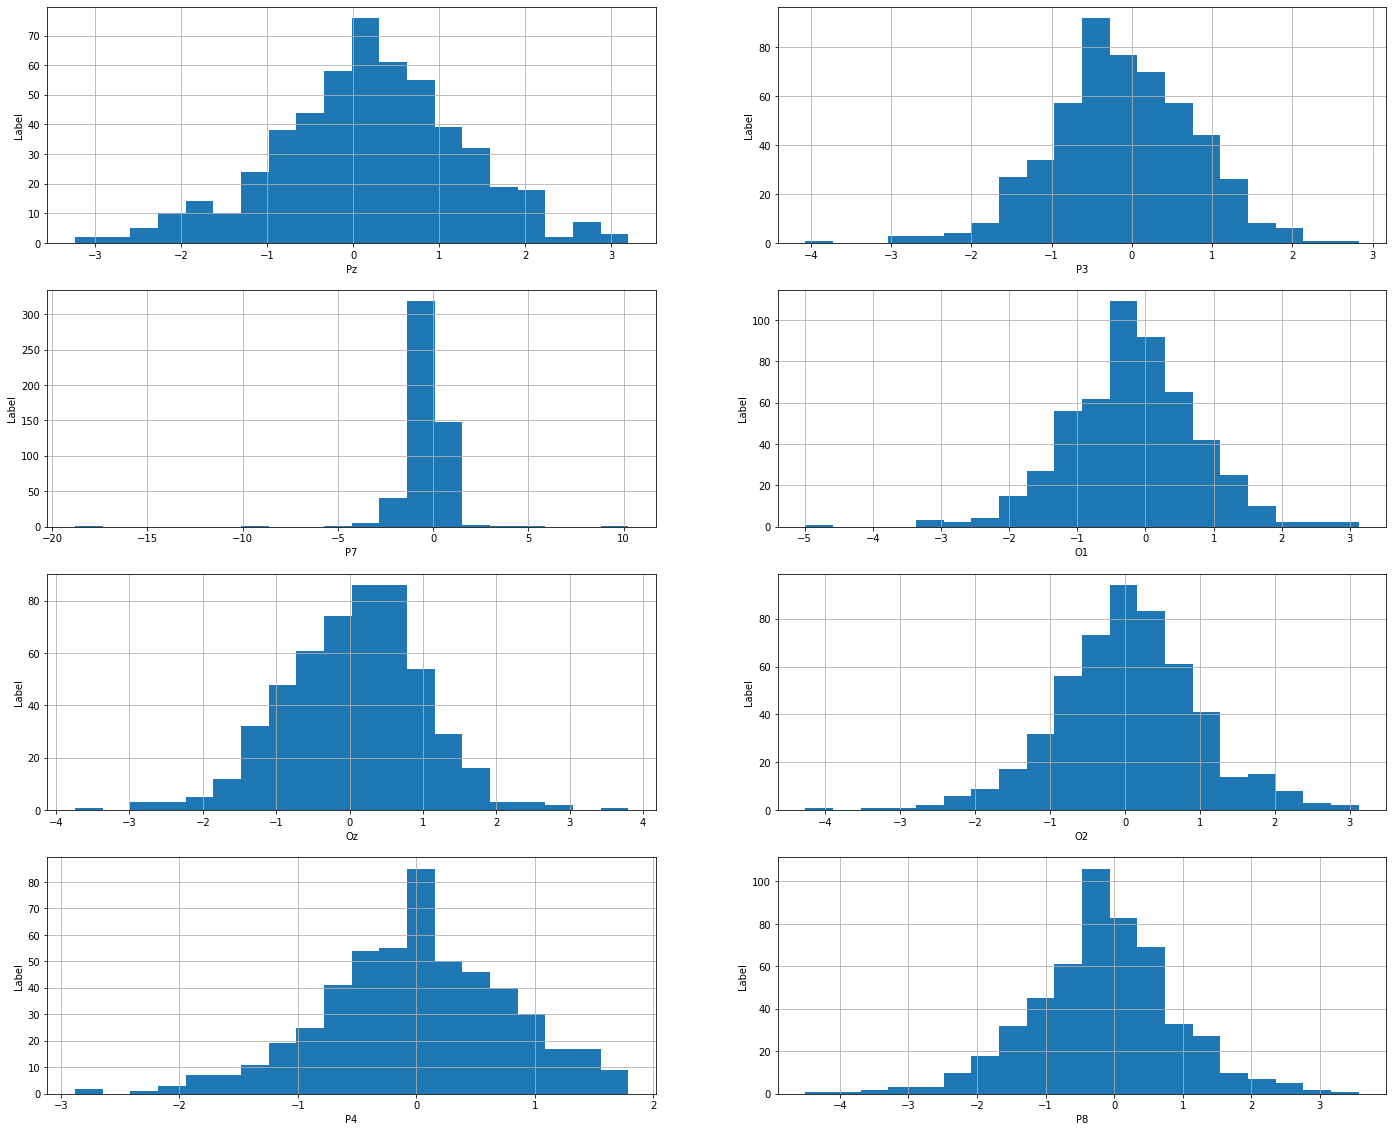

In [ ]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['Pz'].hist(bins=20)
fig.set_xlabel('Pz')
fig.set_ylabel('Label')

plt.subplot(4, 2, 2)
fig = df['P3'].hist(bins=20)
fig.set_xlabel('P3')
fig.set_ylabel('Label')

plt.subplot(4, 2, 3)
fig = df['P7'].hist(bins=20)
fig.set_xlabel('P7')
fig.set_ylabel('Label')

plt.subplot(4, 2, 4)
fig = df['O1'].hist(bins=20)
fig.set_xlabel('O1')
fig.set_ylabel('Label')

plt.subplot(4, 2, 5)
fig = df['Oz'].hist(bins=20)
fig.set_xlabel('Oz')
fig.set_ylabel('Label')

plt.subplot(4, 2, 6)
fig = df['O2'].hist(bins=20)
fig.set_xlabel('O2')
fig.set_ylabel('Label')

plt.subplot(4, 2, 7)
fig = df['P4'].hist(bins=20)
fig.set_xlabel('P4')
fig.set_ylabel('Label')

plt.subplot(4, 2, 8)
fig = df['P8'].hist(bins=20)
fig.set_xlabel('P8')
fig.set_ylabel('Label')

Text(0, 0.5, 'Label')

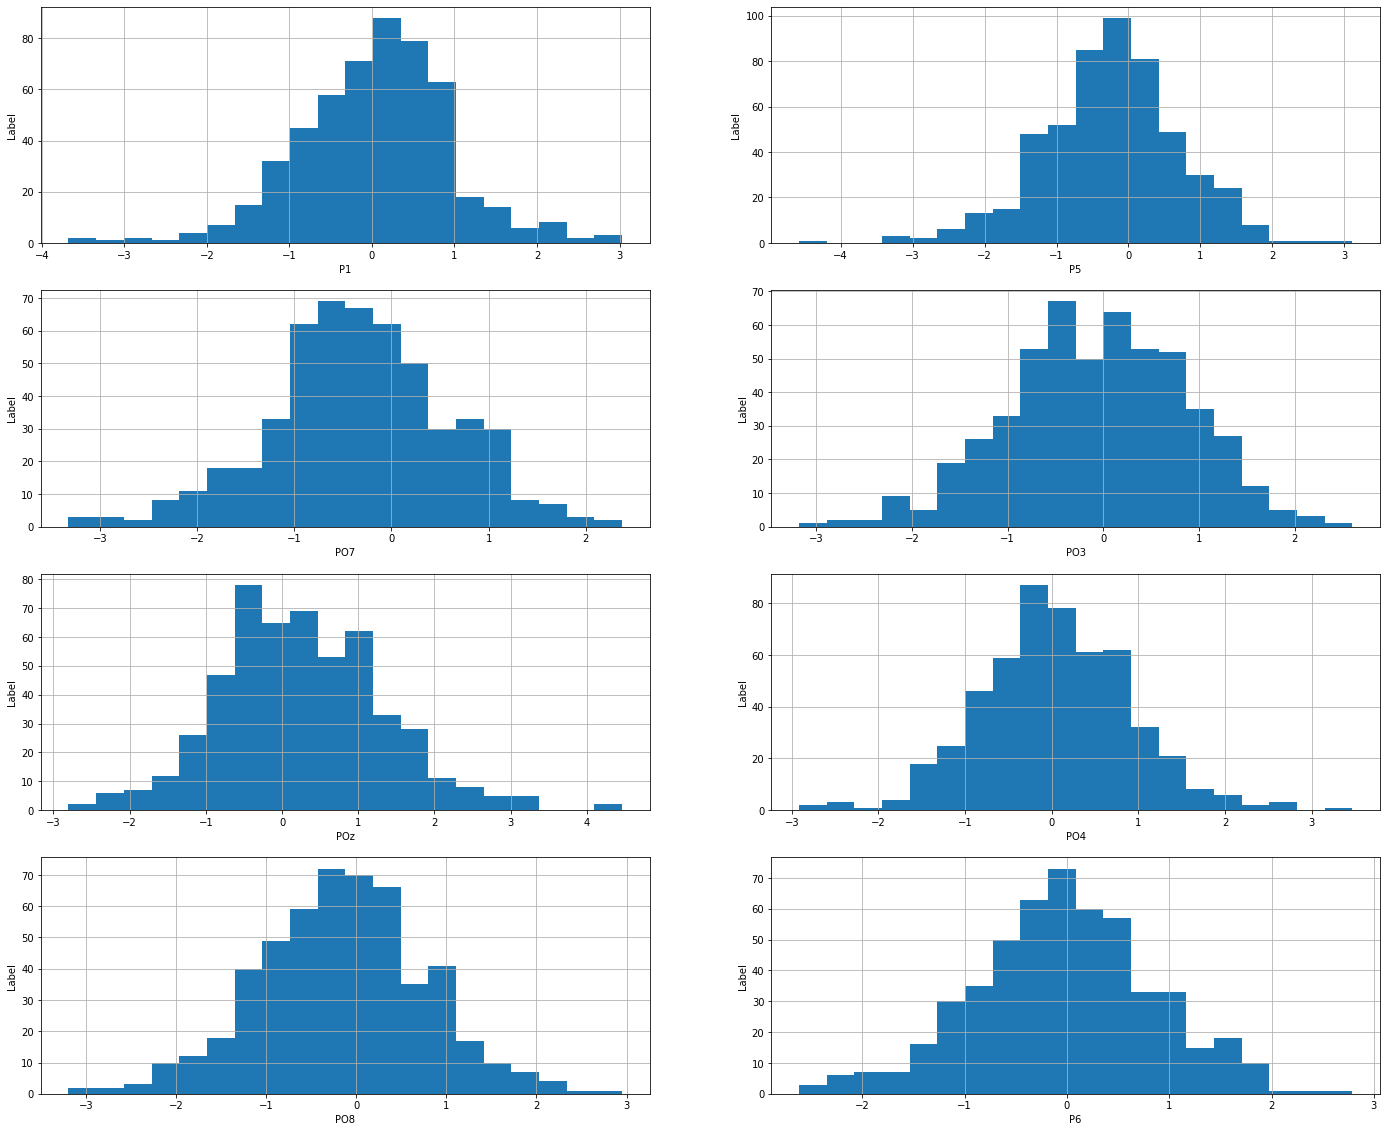

In [ ]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['P1'].hist(bins=20)
fig.set_xlabel('P1')
fig.set_ylabel('Label')

plt.subplot(4, 2, 2)
fig = df['P5'].hist(bins=20)
fig.set_xlabel('P5')
fig.set_ylabel('Label')

plt.subplot(4, 2, 3)
fig = df['PO7'].hist(bins=20)
fig.set_xlabel('PO7')
fig.set_ylabel('Label')

plt.subplot(4, 2, 4)
fig = df['PO3'].hist(bins=20)
fig.set_xlabel('PO3')
fig.set_ylabel('Label')

plt.subplot(4, 2, 5)
fig = df['POz'].hist(bins=20)
fig.set_xlabel('POz')
fig.set_ylabel('Label')

plt.subplot(4, 2, 6)
fig = df['PO4'].hist(bins=20)
fig.set_xlabel('PO4')
fig.set_ylabel('Label')

plt.subplot(4, 2, 7)
fig = df['PO8'].hist(bins=20)
fig.set_xlabel('PO8')
fig.set_ylabel('Label')

plt.subplot(4, 2, 8)
fig = df['P6'].hist(bins=20)
fig.set_xlabel('P6')
fig.set_ylabel('Label')

Text(0, 0.5, 'Label')

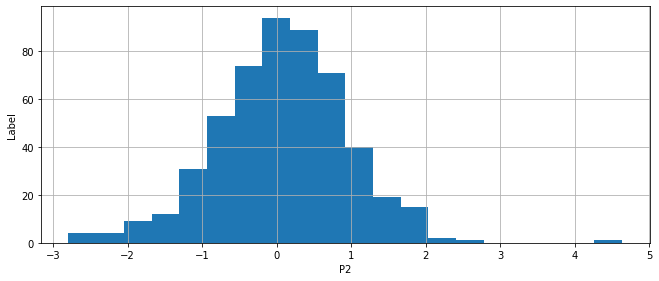

In [ ]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['P2'].hist(bins=20)
fig.set_xlabel('P2')
fig.set_ylabel('Label')

In [ ]:
X = df.drop(['label'], axis=1)

y = df['label']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((415, 17), (104, 17))

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,Pz,P3,P7,O1,Oz,O2,P4,P8,P1,P5,PO7,PO3,POz,PO4,PO8,P6,P2
count,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,415.000000,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02
mean,1.712151e-17,1.712151e-17,-4.708416e-17,-8.560756e-18,0.000000,-2.140189e-17,-4.280378e-18,1.284113e-17,-8.560756e-18,-2.140189e-17,1.284113e-17,8.560756e-18,-8.560756e-18,-2.568227e-17,2.354208e-17,8.560756e-18,-1.712151e-17
std,1.001207e+00,1.001207e+00,1.001207e+00,1.001207e+00,1.001207,1.001207e+00,1.001207e+00,1.001207e+00,1.001207e+00,1.001207e+00,1.001207e+00,1.001207e+00,1.001207e+00,1.001207e+00,1.001207e+00,1.001207e+00,1.001207e+00
min,-3.096482e+00,-4.440362e+00,-4.224651e+00,-5.101737e+00,-3.978831,-4.515609e+00,-3.621963e+00,-3.526717e+00,-3.964179e+00,-4.633130e+00,-3.250474e+00,-3.339961e+00,-2.833623e+00,-3.442063e+00,-3.297496e+00,-2.780780e+00,-3.161542e+00
25%,-6.071678e-01,-5.724758e-01,-2.412503e-01,-6.135925e-01,-0.637300,-6.494135e-01,-6.003257e-01,-5.838166e-01,-5.969029e-01,-5.845654e-01,-6.410774e-01,-7.019681e-01,-6.735722e-01,-6.458005e-01,-6.618484e-01,-6.803626e-01,-6.037467e-01
50%,3.250877e-02,-2.501644e-02,1.233892e-01,-7.804687e-03,0.020991,1.030430e-02,2.834636e-02,-4.725491e-03,1.401623e-02,-5.169626e-03,-2.135273e-02,2.543736e-02,-5.213850e-02,-6.666192e-02,2.776004e-03,-6.133397e-03,1.230792e-02
75%,5.984117e-01,6.435036e-01,3.371398e-01,6.271184e-01,0.628786,5.930338e-01,6.412427e-01,5.984707e-01,6.600090e-01,6.290645e-01,6.434440e-01,7.371500e-01,6.128345e-01,6.465555e-01,6.325735e-01,6.135152e-01,6.040243e-01
max,2.801201e+00,3.295564e+00,1.039296e+01,3.491893e+00,3.897298,3.182926e+00,2.252589e+00,3.494412e+00,3.162348e+00,3.535899e+00,2.849162e+00,2.865971e+00,3.919348e+00,3.903522e+00,3.297460e+00,3.203635e+00,5.100922e+00


In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.1058


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.0385


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.0385


In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score with linear kernel and C=1.0 : 0.0865


In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.0962


In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.1058


In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array(['Soda', 'Soda', 'Drink', 'Steak', 'Pillow', 'Drink', 'Pillow',
       'Tomato', 'Cot', 'Shower', 'Bed', 'Bed', 'Soda', 'Pillow',
       'Biscuit', 'Spaghetti', 'Pillow', 'Pillow', 'Drink', 'Spaghetti',
       'Smoothie', 'Smoothie', 'Tomato', 'Biscuit', 'Tomato', 'Sofabed',
       'Smoothie', 'Bed', 'Sofabed', 'Drink', 'Shower', 'Steak', 'Tomato',
       'Shower', 'Smoothie', 'Cot', 'Shower', 'Drink', 'Shower', 'Pillow',
       'Tomato', 'Toilet', 'Spaghetti', 'Tomato', 'Shower', 'Tomato',
       'Steak', 'Tomato', 'Smoothie', 'Bed', 'Tomato', 'Shower',
       'Sofabed', 'Spaghetti', 'Biscuit', 'Bed', 'Spaghetti', 'Bed',
       'Smoothie', 'Soda', 'Tomato', 'Cot', 'Steak', 'Tomato', 'Shower',
       'Steak', 'Cot', 'Soda', 'Biscuit', 'Shower', 'Smoothie',
       'Smoothie', 'Drink', 'Cot', 'Shower', 'Cot', 'Shower', 'Shower',
       'Soda', 'Smoothie', 'Pillow', 'Steak', 'Pillow', 'Cot', 'Shower',
       'Spaghetti', 'Drink', 'Spaghetti', 'Smoothie', 'Smoothie',
       'Pillow',

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.3325


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.3325
Test set score: 0.0865


In [ ]:
# check class distribution in test set

y_test.value_counts()

Cot          12
Sofabed      12
Toilet       11
Smoothie      9
Tomato        9
Drink         8
Soda          8
Steak         8
Bed           7
Biscuit       7
Spaghetti     5
Shower        5
Pillow        3
Name: label, dtype: int64

In [ ]:
# check null accuracy score

null_accuracy = (12/(12+92))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.1154


In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.0769


In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.1058


In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=1.0 : 0.1250


In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=100.0 : 0.1154


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1 0 0 0 3 0 0 0 2 1 0 0 0]
 [0 1 2 0 0 2 0 1 0 0 0 0 1]
 [0 3 2 0 1 0 2 1 1 0 0 0 2]
 [1 0 2 0 0 0 1 0 0 1 2 1 0]
 [1 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 3 0 0 0 0 0 0 1]
 [0 0 3 0 3 0 0 1 0 0 1 0 1]
 [1 3 1 0 0 1 0 0 0 0 0 0 2]
 [2 1 2 0 1 0 1 1 1 2 1 0 0]
 [0 1 0 2 0 0 0 0 0 0 2 0 0]
 [0 0 0 3 1 1 1 0 0 2 0 0 0]
 [2 0 2 1 2 0 0 0 0 2 0 1 1]
 [1 2 1 0 1 2 0 1 0 0 1 0 0]]

True Positives(TP) =  1

True Negatives(TN) =  1

False Positives(FP) =  0

False Negatives(FN) =  0


In [ ]:
from sklearn.metrics import classification_report

print("Using SVM")
print(classification_report(y_test, y_pred_test))

Using SVM
              precision    recall  f1-score   support

         Bed       0.11      0.14      0.12         7
     Biscuit       0.08      0.14      0.11         7
         Cot       0.13      0.17      0.15        12
       Drink       0.00      0.00      0.00         8
      Pillow       0.00      0.00      0.00         3
      Shower       0.33      0.60      0.43         5
    Smoothie       0.00      0.00      0.00         9
        Soda       0.00      0.00      0.00         8
     Sofabed       0.25      0.08      0.12        12
   Spaghetti       0.00      0.00      0.00         5
       Steak       0.00      0.00      0.00         8
      Toilet       0.50      0.09      0.15        11
      Tomato       0.00      0.00      0.00         9

    accuracy                           0.09       104
   macro avg       0.11      0.09      0.08       104
weighted avg       0.13      0.09      0.08       104

